In [14]:
import csv
import pandas as pd
import numpy as np

In [21]:
# Load the CSV file
df = pd.read_csv('results/results4.csv')

# Calculate the accuracy
accuracy = {}

for inx in ['simple_length','tsp_length','valid_length','AI_prediction']:
    #accuracy[inx] = df['true_length'] / df[inx]
    accuracy[inx] = (df['true_length']-df[inx]) / df['true_length']



Datapoints 22


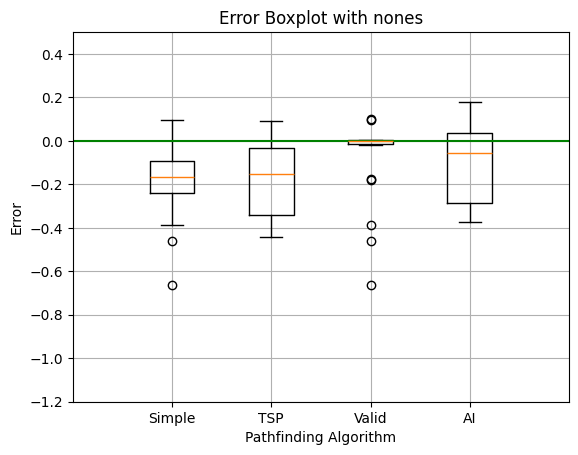

In [16]:
#analysis change nan to simple
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
accuracy_values = []
for key in accuracy:
    accuracy_values.append(list(accuracy[key]))



for i in range(len(accuracy_values)):
    tmp=[]
    for j in range(len(accuracy_values[i])):
        if np.isnan(accuracy_values[i][j]):
            accuracy_values[i][j] = accuracy_values[0][j]

print("Datapoints",len(accuracy_values[0]))
# Plot the accuracy as a boxplot
plt.boxplot(accuracy_values, labels=['Simple', 'TSP', 'Valid', 'AI'])

plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Error')
plt.title('Error Boxplot with nones')

# Show the plot
plt.show()

In [17]:
# Calculate the mean square error
mse = []
for i in range(len(accuracy_values)):
    mse.append(0)
    for j in range(len(accuracy_values[i])):
        mse[i] += (accuracy_values[i][j])**2
    mse[i] = mse[i]/len(accuracy_values[i])


# Print the result
print("Mean Square Error:", mse)

Mean Square Error: [0.0627498852826712, 0.05957076291289906, 0.0404027501850291, 0.444323798832032]


Datapoints 15


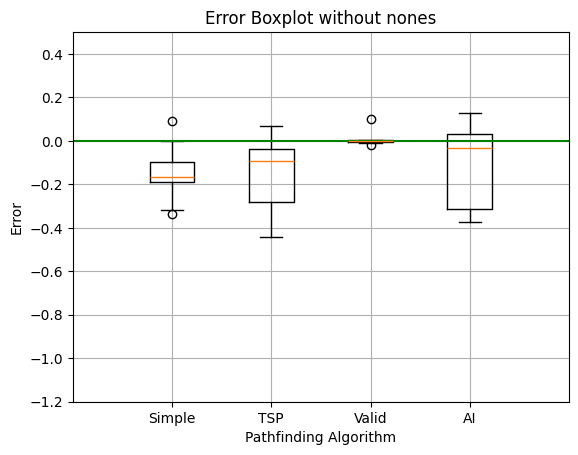

In [28]:
#analysis delete nan values
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
accuracy_values_n = []
for key in accuracy:
    accuracy_values_n.append(list(accuracy[key]))

nones=[]
for i in range(len(accuracy_values_n)): 
    for j in range(len(accuracy_values_n[i])):
        if np.isnan(accuracy_values_n[i][j]):
            nones.append(j)

for i in range(len(accuracy_values_n)):
    accuracy_values_n[i] = [x for j, x in enumerate(accuracy_values_n[i]) if j not in nones]

print("Datapoints",len(accuracy_values_n[0]))
# Plot the accuracy as a boxplot
plt.boxplot(accuracy_values_n, labels=['Simple', 'TSP', 'Valid', 'AI'])

plt.axis([0, 5, -1.2, 0.5])
plt.grid(True)
plt.axhline(y=0, color='g')
# Add labels and title
plt.xlabel('Pathfinding Algorithm')
plt.ylabel('Error')
plt.title('Error Boxplot without nones')

# Show the plot
plt.show()

In [29]:
# Calculate the mean square error
mse = []
mse_true = []
for i in range(len(accuracy_values)):
    mse.append(0)
    mse_true.append(0)
    for j in range(len(accuracy_values[i])):
        if j not in nones:
            mse[i] += (accuracy_values[i][j])**2
            mse_true[i] += (df.iloc[j][2+i]-df.iloc[j][1])**2
    mse[i] = mse[i]/(len(accuracy_values[i])-len(nones))
    mse_true[i] = mse_true[i]/(len(accuracy_values[i])-len(nones))


# Print the result
print("Mean Square Error:", mse)
print("Mean Square Error True:", mse_true)

C:\Users\freyt\AppData\Local\Temp\ipykernel_27436\1675743599.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mse_true[i] += (df.iloc[j][2+i]-df.iloc[j][1])**2


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U5071'), dtype('int64')) -> None

In [30]:
lengths = []

for i in range(len(df['simple_path'])):
    lengths.append(df['simple_path'][i].count('('))

print("Simple path lengths",lengths)
print("Simple path mean",np.mean(lengths))
lengths_not_nan = [x for j, x in enumerate(lengths) if j not in nones]
print("Simple path mean without nan",np.mean(lengths_not_nan))

Simple path lengths [268, 10, 290, 264, 308, 217, 101, 329, 255, 154, 83, 140, 204, 183, 81, 103, 251, 203, 107, 228, 16, 118]
Simple path mean 177.86363636363637
Simple path mean without nan 189.4


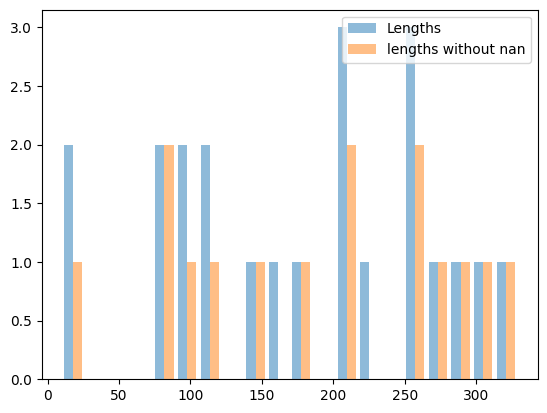

In [31]:
plt.hist((lengths,lengths_not_nan), bins=20, alpha=0.5, label=('Lengths','lengths without nan'))
plt.legend(loc='upper right')